In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
import pandas_profiling as pp
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [4]:
train = pd.read_csv('../data/bank/train.csv', sep='\t', index_col='Unnamed: 0')
test = pd.read_csv('../data/bank/test.csv', sep = '\t', index_col='Unnamed: 0')

In [5]:
train.head()

0  1  2  3  4  5  6         7  8  9 ...        336  337  338  339  340  \
0  1  1  0  0  0  0  0  0.090909  0  0 ...   0.221395    0    1    0    0   
1  1  1  0  0  1  0  0  0.090909  0  0 ...   0.241508    0    1    0    0   
2  0  1  0  0  1  0  0  0.090909  0  0 ...   0.123067    0    1    0    0   
3  0  1  0  0  1  0  0  0.136364  0  0 ...   0.296065    0    0    1    0   
4  0  1  0  0  1  0  0  0.136364  0  0 ...   0.178956    0    0    1    0   

        341  342  343  344  345  
0  0.222222    1    1    1    1  
1  0.111111    1    1    1    0  
2  0.444444    1    1    1    1  
3  0.222222    1    1    1    0  
4  0.111111    1    1    1    1  

[5 rows x 346 columns]

In [6]:
test.head()

0  1  2  3  4  5  6         7  8  9 ...        336  337  338  339  340  \
0 NaN  1  0  0  1  0  0  0.136364  0  0 ...   0.192984    0    1    0    0   
1 NaN  1  0  0  1  0  0  0.181818  0  0 ...   0.195690    0    1    0    0   
2 NaN  1  0  0  0  0  0  0.090909  0  0 ...   0.192984    0    1    0    0   
3 NaN  1  0  0  1  0  0  0.090909  0  0 ...   0.195690    0    1    0    0   
4 NaN  1  0  0  1  0  0  0.090909  0  0 ...   0.289893    0    0    1    0   

        341  342  343  344  345  
0  0.222222    1    1    1    1  
1  0.000000    1    1    1    0  
2  0.222222    1    1    1    0  
3  0.000000    1    1    1    0  
4  0.000000    1    1    1    1  

[5 rows x 346 columns]

# Data pre-processing

In [7]:
len(test) / len(train)

0.13659016393442622

In [8]:
len(test)

4166

## dropping columns

In [9]:
# 0 column - target

In [10]:
# constant values in test or test
train1 = train.drop(['11', '129', '130', '137', '138', '140', '141', '149', '150', '152', '160', '164', '178', '186', '188', '192', '193', '291', '301', '303', '305', '5'], axis=1)

In [11]:
test1 = test.drop(['11', '129', '130', '137', '138', '140', '141', '149', '150', '152', '160', '164', '178', '186', '188', '192', '193', '291', '301', '303', '305', '5'], axis=1)

In [12]:
# small percentage in test <= 25
train2 = train1.drop(['131', '132', '133', '134', '135', '136', '139', '14', '143', '154', '155', '156', '157', '16', '161', '162', '169', '17', '170', '172', '174', '175', '181', '182', '183', '185', '191', '215', '220', '224', '226', '227', '228', '229', '230', '232', '234', '235', '236', '243', '244', '245', '246', '247', '250', '256', '257', '258', '259', '26', '261', '262', '263', '264', '265', '266', '267', '269', '27', '270', '272', '276', '277', '279', '28', '280', '285', '287', '29', '290', '296', '3', '300', '302', '304', '306', '307', '308', '309', '310', '316', '32', '340', '6', '8'], axis=1)

In [13]:
# small percentage in test <= 25
test2 = test1.drop(['131', '132', '133', '134', '135', '136', '139', '14', '143', '154', '155', '156', '157', '16', '161', '162', '169', '17', '170', '172', '174', '175', '181', '182', '183', '185', '191', '215', '220', '224', '226', '227', '228', '229', '230', '232', '234', '235', '236', '243', '244', '245', '246', '247', '250', '256', '257', '258', '259', '26', '261', '262', '263', '264', '265', '266', '267', '269', '27', '270', '272', '276', '277', '279', '28', '280', '285', '287', '29', '290', '296', '3', '300', '302', '304', '306', '307', '308', '309', '310', '316', '32', '340', '6', '8'], axis=1)

In [14]:
# different distribution:
train3 = train2.drop(['121', '106', '107', '108', '197', '199', '203'], axis=1)

In [15]:
test3 = test2.drop(['121', '106', '107', '108', '197', '199', '203'], axis = 1)

In [16]:
# different distribution:
# 121, 106, 107, 108, 197?, 199, 203?, 

In [17]:
# correllation >= 0.99
train4 = train3.drop(['165', '180', '9'], axis=1)

In [18]:
test4 = test3.drop(['165', '180', '9'], axis=1)

In [19]:
train5 = train1.drop(['165', '180', '9'], axis=1)

In [20]:
test5 = test1.drop(['165', '180', '9'], axis=1)

In [21]:
# high correllation:
# 117-110 (0.92); # 119-115 (0.93); 122-119 (0.95); 128-14(0.91 test); 146-35(0.97); 148-39(0.95); 153-17(1-0.96);
# 158-20(0.94-0.94); 165-22(0.99-0.99); 179-24(0.94-0.95); 180-26(0.99-0.96); 206-204(0.92-0.92); 323-219(0.95-0.95);
# 324-232(0.94-0.94); 325-324(0.93-0.93); 326-325(0.96-0.96); 327-324(0.94-0.94); 333-327(0.93-0.93); 334-333(0.94);
# 335-334(0.90); 341-311(0.90); 9-2(1)!!!!!!!!; 

In [22]:
test5['23'].nunique()

2

In [35]:
df = pd.DataFrame()
# n = 346

Empty DataFrame
Columns: []
Index: []

In [127]:
values = np.arange(10, dtype=int)
bins = np.arange(1, 4)
freq, bins = np.histogram(values, bins)

In [129]:
freq

array([1, 2])

In [142]:
train5['117'].unique()

array([0.75, 1.  , 0.5 , 0.  , 0.25])

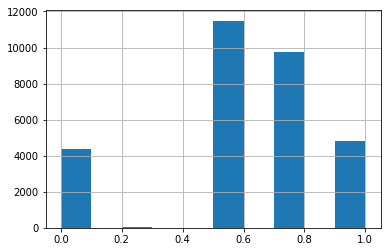

In [143]:
train5['117'].hist()

In [143]:
train5['117'].quantile(0.25)

0.5

In [157]:
np.percentile(train5['124'], [0, 20, 40, 60, 100])

array([0. , 0.5, 0.5, 0.5, 1. ])

In [168]:
train5['124'].unique()

array([0.5 , 0.25, 0.75, 1.  , 0.  ])

In [159]:
train5['124'].unique()

array([0.5 , 0.25, 0.75, 1.  , 0.  ])

In [203]:
np.percentile(train5['124'], [0, 20, 40, 60, 80])

array([0. , 0.5, 0.5, 0.5, 0.5])

In [144]:
train5['124'].mean() / 2

0.27227868852459014

In [46]:
df['new'] = (train5['124'] < train5['124'].mean() / 2)

In [41]:
df['new'].head()

0    False
1    False
2     True
3    False
4    False
Name: new, dtype: bool

In [40]:
d = {True: 1, False: 0}

In [43]:
df['new'].value_counts()

False    30150
True       350
Name: new, dtype: int64

In [47]:
df['new'].map(d).head()

0    0
1    0
2    1
3    0
4    0
Name: new, dtype: int64

In [193]:
df['new'].unique()

array([False,  True])

In [ ]:
df.append(train5[col].nunique() >= 10)

In [159]:
fill_column(train5['7']).head()

7


TypeError: list indices must be integers or slices, not str

In [21]:
train5.head()

0  1  2  3  4  6         7  8  10  12 ...        336  337  338  339  340  \
0  1  1  0  0  0  0  0.090909  0   1   1 ...   0.221395    0    1    0    0   
1  1  1  0  0  1  0  0.090909  0   1   1 ...   0.241508    0    1    0    0   
2  0  1  0  0  1  0  0.090909  0   1   1 ...   0.123067    0    1    0    0   
3  0  1  0  0  1  0  0.136364  0   1   1 ...   0.296065    0    0    1    0   
4  0  1  0  0  1  0  0.136364  0   1   1 ...   0.178956    0    0    1    0   

        341  342  343  344  345  
0  0.222222    1    1    1    1  
1  0.111111    1    1    1    0  
2  0.444444    1    1    1    1  
3  0.222222    1    1    1    0  
4  0.111111    1    1    1    1  

[5 rows x 321 columns]

In [167]:
def fill_column(column):
    res = pd.DataFrame()
#     print(column.name)
    res[column.name + '__1'] = column < column.mean() / 2
    res[column.name + '__2'] = ((column >= column.mean() / 2) & (column < column.mean()))
    res[column.name + '__3'] = (column >= column.mean()) & (column < column.mean() + column.mean() / 2)
    res[column.name + '__4'] = column >= column.mean() + column.mean() / 2
    res = res.astype('int32')
    return(res)

In [171]:
df_train = pd.DataFrame()

In [172]:
columns_to_drop = []
for col in train5.columns:
    if train5[col].nunique() > 2:
        df_train = pd.concat([df_train, fill_column(train5[col])], axis = 1)
        columns_to_drop.append(col)

In [173]:
df_test = pd.DataFrame()

In [174]:
for col in test5.columns:
    if test5[col].nunique() > 2:
        df_test = pd.concat([df_test, fill_column(test5[col])], axis = 1)
#         columns_to_drop.append(col)

In [177]:
train6 = train5.drop(columns_to_drop, axis=1)

In [178]:
train6 = pd.concat([train6, df_train], axis=1)

In [179]:
test6 = test5.drop(columns_to_drop, axis=1)

In [180]:
test6 = pd.concat([test6, df_test], axis = 1)

In [170]:
columns_to_drop

['7',
 '13',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '211',
 '212',
 '213',
 '214',
 '311',
 '312',
 '313',
 '314',
 '315',
 '317',
 '319',
 '320',
 '321',
 '322',
 '323',
 '324',
 '325',
 '326',
 '327',
 '328',
 '329',
 '330',
 '331',
 '333',
 '334',
 '335',
 '336',
 '341']

In [65]:
test = train5['142'] < train5['142'].mean() / 2

In [82]:
t = pd.DataFrame()
t[0] = test
t = t.astype('int32')

In [74]:
srav = pd.DataFrame()
srav['s'] = train5['142'] < train5['142'].mean() / 10

In [77]:
t.head()

0
0  True
1  True
2  True
3  True
4  True

In [64]:
df.head()

new    0
0  False  NaN
1  False  NaN
2   True  NaN
3  False  NaN
4  False  NaN

In [17]:
pp.ProfileReport(train)

In [19]:
pp.ProfileReport(test)

In [23]:
X, y = train5.drop('0', axis = 1), train5['0']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                   stratify = y)

In [11]:
# X_train, y_train = train1.drop('0', axis = 1), train1['0']

In [12]:
# X_test = test1.drop('0', axis = 1)

In [13]:
# X_train = X_train.drop(['131', '132', '133', '134', '135', '136', '139', '14', '143', '154', '155', '156', '157', '16', '161', '162', '169', '17', '170', '172', '174', '175', '181', '182', '183', '185', '191', '215', '220', '224', '226', '227', '228', '229', '230', '232', '234', '235', '236', '243', '244', '245', '246', '247', '250', '256', '257', '258', '259', '26', '261', '262', '263', '264', '265', '266', '267', '269', '27', '270', '272', '276', '277', '279', '28', '280', '285', '287', '29', '290', '296', '3', '300', '302', '304', '306', '307', '308', '309', '310', '316', '32', '340', '6', '8'], axis=1)

In [14]:
# X_train = X_train.drop(['121', '106', '107', '108', '197', '199', '203'], axis=1)

In [15]:
# X_test = X_test.drop(['131', '132', '133', '134', '135', '136', '139', '14', '143', '154', '155', '156', '157', '16', '161', '162', '169', '17', '170', '172', '174', '175', '181', '182', '183', '185', '191', '215', '220', '224', '226', '227', '228', '229', '230', '232', '234', '235', '236', '243', '244', '245', '246', '247', '250', '256', '257', '258', '259', '26', '261', '262', '263', '264', '265', '266', '267', '269', '27', '270', '272', '276', '277', '279', '28', '280', '285', '287', '29', '290', '296', '3', '300', '302', '304', '306', '307', '308', '309', '310', '316', '32', '340', '6', '8'], axis=1)

In [16]:
# X_test = X_test.drop(['121', '106', '107', '108', '197', '199', '203'], axis=1)

In [24]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)

In [25]:
clf = LogisticRegression(random_state=42, penalty="l1", class_weight="balanced")

In [26]:
params = {'C': [0.65, 0.6, 0.55, 0.5, 0.45]}

In [186]:
gcv = GridSearchCV(clf, cv=kf, param_grid=params, verbose=1, scoring="roc_auc")

In [187]:
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  7.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.65, 0.6, 0.55, 0.5, 0.45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [71]:
gcv.best_params_

{'C': 0.45}

In [72]:
gcv.best_score_

0.7257872787280865

In [73]:
y_pred = gcv.predict(X_test)

In [74]:
roc_auc_score(y_test, y_pred)

0.6679045811873137

train4: 0.5483558540966962 <br>
train3: 0.5484932299874571 <br>
train3 with balanced: 0.6658862123307496 <br>
train4 with balanced: 0.6665464436184534 <br>
train2 with balanced: 0.6665087686250005 <br>
train1 with balanced: 0.6675434525915341 <br>
train5 with balanced: 0.6679045811873137 <br>

In [80]:
res = test5.drop("0", axis=1)

In [81]:
y_pred = gcv.predict(res)

In [82]:
y_pred = pd.DataFrame(y_pred)

In [83]:
y_pred.to_csv("dv.csv")

In [28]:
# from sklearn import metrics
# y_test.value_counts()/y_test.count()
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("Train Accuracy:", metrics.accuracy_score(y_train, gcv.predict(X_train)))

In [27]:
skf = StratifiedKFold(shuffle=True, random_state=42)

In [29]:
lg = LogisticRegression(random_state=42, penalty="l1", class_weight= 'balanced')
parameters = {"C": [0.01, 0.1, 0.45, 0.5]}
rgcv = RandomizedSearchCV(lg, parameters, scoring ='roc_auc', n_iter=5, cv=skf, random_state=1)
rgcv = rgcv.fit(X_train, y_train)
print(rgcv.best_score_)

0.725672571576546


In [32]:
rgcv.best_params_

{'C': 0.1}

In [33]:
y_pred = rgcv.predict(X_test)

In [34]:
roc_auc_score(y_test, y_pred)

0.6644173470372293

In [27]:
parameters = {'max_features': [0.5, 0.7, 1.], 'max_samples': [0.5, 0.7, 1.]}

In [28]:
bg = c

In [29]:
gcv = GridSearchCV(bg, cv=kf, param_grid=parameters, verbose=1, scoring="roc_auc")

In [ ]:
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# lg = LogisticRegression(random_state=42, penalty="l1", class_weight= 'balanced')


# rgcv = RandomizedSearchCV(bg, parameters, scoring ='roc_auc', n_iter=10, cv=skf, random_state=1)
# rgcv = rgcv.fit(X_train, y_train)
# print(rgcv.best_score_)

In [39]:
rgcv.best_params_

{'base_estimator__C': 0.01, 'max_features': 0.7, 'max_samples': 0.9}

In [25]:
lg = LogisticRegression(random_state=42, penalty="l1", class_weight='balanced', C=0.45)

In [26]:
bg = BaggingClassifier(lg, random_state=42, n_estimators=25, max_features=0.7, max_samples=0.9)

In [27]:
%time
bg.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


BaggingClassifier(base_estimator=LogisticRegression(C=0.45, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.9, n_estimators=25, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [40]:
X_train

1  2  3  4  6         7  8  10  12        13 ...        336  337  338  \
29430  1  0  0  0  0  0.090909  1   1   1  0.000000 ...   0.174412    0    1   
29132  1  0  0  0  0  0.090909  0   1   1  0.666667 ...   0.154625    0    1   
14578  1  0  0  0  0  0.090909  0   1   1  0.071429 ...   0.109160    1    0   
17872  1  0  0  0  0  0.090909  0   1   1  0.000000 ...   0.450414    1    0   
20144  1  0  0  1  0  0.090909  0   1   1  0.181818 ...   0.154625    0    1   
28284  1  0  0  1  0  0.090909  0   1   1  0.923077 ...   0.221395    0    1   
3579   1  0  0  1  0  0.090909  0   1   1  0.545455 ...   0.192617    0    1   
8180   1  0  0  1  0  0.090909  0   1   1  0.000000 ...   0.268754    0    1   
27379  1  0  0  0  0  0.090909  0   1   1  0.000000 ...   0.450414    1    0   
5873   1  0  0  1  0  0.090909  0   1   1  0.250000 ...   0.178956    0    0   
22281  1  0  0  1  0  0.136364  0   1   1  0.117647 ...   0.221395    0    1   
21487  1  0  0  0  0  0.090909  0   1   1  0.147059 ...   0.450414    1    0   
18935  1  0  0  0  0  0.090909  0   1   1  0.000000 ...   0.248978    0    1   
23926  1  0  0  0  0  0.090909  0   0   1  1.000000 ...   0.268754    0    0   
4151   1  0  0  0  0  0.090909  0   1   1  0.300000 ...   0.109160    1    0   
28589  0  1  0  0  0  0.090909  0   1   0  0.700000 ...   0.327329    1    0   
29873  1  0  0  1  0  0.090909  0   1   1  1.000000 ...   0.220295    0    1   
24350  0  1  0  1  0  0.090909  0   1   1  1.000000 ...   0.260746    0    1   
12104  1  0  0  0  0  0.090909  0   1   1  0.800000 ...   0.268754    1    0   
2011   1  0  0  0  0  0.090909  0   1   1  0.000000 ...   0.273538    0    1   
10725  1  0  0  0  0  0.090909  0   1   1  0.142857 ...   0.450414    1    0   
17858  1  0  0  0  0  0.090909  0   1   1  1.000000 ...   0.450414    1    0   
19394  1  0  0  1  0  0.090909  0   1   1  0.000000 ...   0.220295    0    1   
808    1  0  0  1  0  0.090909  0   1   1  0.333333 ...   0.241508    0    1   
159    1  0  0  1  0  0.090909  0   1   1  0.444444 ...   0.123067    0    1   
21940  1  0  0  0  0  0.090909  0   1   1  0.000000 ...   0.450414    1    0   
21824  1  0  0  1  0  0.090909  0   1   1  0.000000 ...   0.220295    0    1   
19972  1  0  0  1  0  0.090909  0   1   1  0.272727 ...   0.289893    0    0   
6818   1  0  0  0  0  0.136364  0   1   1  0.800000 ...   0.450414    1    0   
14411  1  0  0  0  0  0.090909  0   1   1  0.333333 ...   0.450414    1    0   
...   .. .. .. .. ..       ... ..  ..  ..       ... ...        ...  ...  ...   
9059   1  0  0  0  0  0.090909  0   1   1  0.500000 ...   0.450414    1    0   
26305  1  0  0  0  0  0.090909  0   1   1  0.951220 ...   0.450414    1    0   
27129  1  0  0  0  0  0.090909  0   1   1  0.333333 ...   0.450414    1    0   
26960  1  0  0  0  0  0.090909  0   1   1  0.000000 ...   0.450414    1    0   
1881   1  0  0  0  0  0.090909  0   1   1  0.500000 ...   0.450414    1    0   
17036  1  0  0  0  0  0.090909  0   0   1  0.000000 ...   0.450414    0    0   
27471  1  0  0  1  0  0.090909  0   1   1  0.000000 ...   0.220295    0    1   
14381  1  0  0  1  0  0.090909  0   1   1  1.000000 ...   0.241508    0    1   
11324  1  0  0  1  0  0.181818  0   1   1  0.000000 ...   0.220295    0    1   
22135  1  0  0  1  0  0.090909  0   1   1  0.478261 ...   0.244622    0    1   
24551  1  0  0  0  0  0.090909  0   1   1  0.785714 ...   0.176179    1    0   
11592  1  0  0  1  0  0.136364  0   1   1  0.800000 ...   0.158549    0    1   
26425  1  0  0  1  0  0.090909  0   1   1  0.500000 ...   0.248978    0    1   
18410  1  0  0  1  0  0.090909  0   1   1  1.000000 ...   0.296065    0    0   
5118   1  0  0  0  0  0.090909  0   1   1  0.020833 ...   0.450414    1    0   
24614  1  0  0  1  0  0.090909  0   1   1  0.000000 ...   0.248896    0    1   
10324  1  0  0  0  0  0.227273  0   1   1  0.600000 ...   0.450414    1    0   
15316  1  0  0  0  0  0.090909  0   0   1  0.193548 ...   0.450414    0    0   
7367   

In [46]:
res.columns ^ X_train.columns

Index(['153'], dtype='object')

In [38]:
res.shape

(4166, 319)

In [28]:
y_pred = bg.predict(X_test)

In [29]:
roc_auc_score(y_test, y_pred)

0.6686911615384262

In [48]:
res = test5.drop("0", axis=1)


In [49]:
y_pred = bg.predict(res)


In [50]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv("dv2.csv")

Bagging: params: {n_estimators=25, max_features=0.7, max_samples=0.9}

validation: 0.6686911615384262 leaderboard: 0.68277953

In [30]:
kf = StratifiedKFold(n_splits = 3, shuffle = True, random_state=42)
rf = RandomForestClassifier(random_state=42, class_weight="balanced", oob_score=True, criterion = "gini")

In [31]:
params = {'n_estimators': [80, 100],
         'max_features': [0.7, 0.9, 1.0],
          'min_samples_leaf': [5, 6, 8, 9]
         }

In [57]:
gcv = GridSearchCV(rf, cv=kf, param_grid=params, verbose=1, scoring="roc_auc")

In [58]:
gcv.fit(X_train, y_train)
y_pred = gcv.predict(X_test)

In [59]:
roc_auc_score(y_test, y_pred)

RandomForest: params: {'max_features': 0.7, 'min_samples_leaf': 9, 'n_estimators': 80, 'class_weight': "balanced"}

validation: 0.6397765229656652 leaderboard: 0.63176139

In [32]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators = 80, oob_score=True, criterion = "gini",
                           max_features=0.7, min_samples_leaf=9)

In [33]:
%time
rf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=0.7,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [62]:
lg.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(C=0.45, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)>

In [ ]:
lg.predict_proba

In [40]:

for i in np.arange(0, 1, 0.05):
    res = roc_auc_score(y_test, i * bg.predict_proba(X_test)[:,1] +
                       (1 - i) * rf.predict_proba(X_test)[:,1])
    print(i, res)

0.0 0.7229131040059544
0.05 0.7248802900055594
0.1 0.7266523011610331
0.15000000000000002 0.7282304239355666
0.2 0.7296065719891018
0.25 0.7306221427882251
0.30000000000000004 0.7315046565373006
0.35000000000000003 0.7321704931289083
0.4 0.7326308631708562
0.45 0.7328719831289542
0.5 0.7329173769015533
0.55 0.7327775199746382
0.6000000000000001 0.732441201740401
0.65 0.7319650265792484
0.7000000000000001 0.7312877955993771
0.75 0.7303981144125227
0.8 0.7293582845932249
0.8500000000000001 0.7281425768776619
0.9 0.7267366563902761
0.9500000000000001 0.7251905114150636


In [39]:
res

0.7251905114150636

In [41]:
res = test5.drop("0", axis=1)

In [42]:
y_pred = 0.5 * bg.predict_proba(res)[:,1] + 0.5 * rf.predict_proba(res)[:,1]

In [43]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv("dv3.csv")

Ensembling: 

validation: 0.7251905114150636 leaderboard: 0.74600208